In [3]:
import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
from mlflow.models import infer_signature

# 1. 데이터 불러오기
df = pd.read_csv("../data/creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
# 2. 데이터 전처리
X = df.drop(columns="Class")
y = df["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 데이터셋 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# 3. MLflow 실험 이름 설정

mlflow.set_tracking_uri("http://localhost:5000")    
mlflow.set_experiment("creditcard_experiment")

2025/10/01 14:49:15 INFO mlflow.tracking.fluent: Experiment with name 'creditcard_experiment' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/Users/SSAFY/mlflow_project/mlruns/2', creation_time=1759297755039, experiment_id='2', last_update_time=1759297755039, lifecycle_stage='active', name='creditcard_experiment', tags={}>

In [7]:
# 4. 첫 번째 모델: Logistic Regression
with mlflow.start_run(run_name="LogisticRegression"):
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    # Metric 계산
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)


    # MLflow 로깅
    mlflow.log_param("model", "LogisticRegression")
    
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)

    signature = infer_signature(X_train, model.predict(X_train))

    # 모델 저장
    mlflow.sklearn.log_model(model, "model", signature=signature)

🏃 View run LogisticRegression at: http://localhost:5000/#/experiments/2/runs/81cc79fabe0048b98003ad52b932cc9d
🧪 View experiment at: http://localhost:5000/#/experiments/2


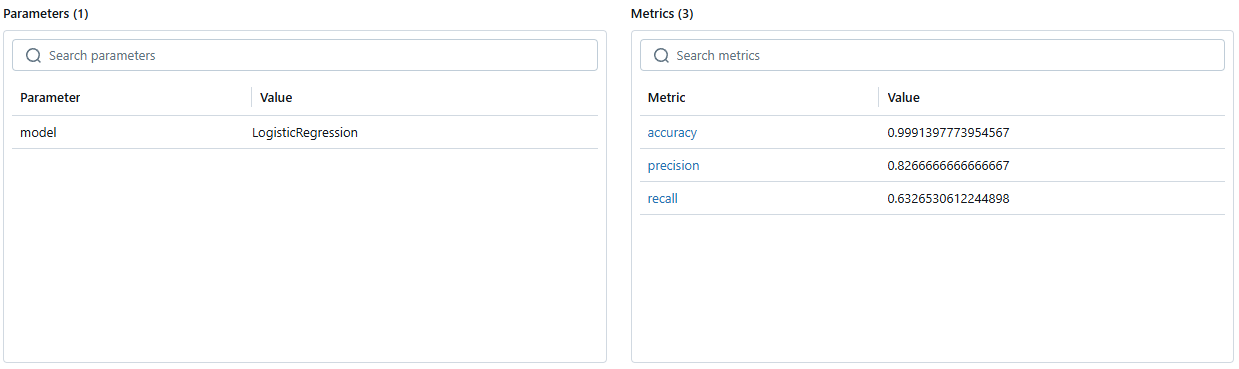

In [8]:
# 5. 두 번째 모델: Random Forest
with mlflow.start_run(run_name="RandomForest"):
    model = RandomForestClassifier(n_estimators=100)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)


    # Metric 계산
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)

    mlflow.log_param("model", "RandomForest")
    
    mlflow.log_metric("n_estimators", 100)
    mlflow.log_metric("accuracy", acc)
    mlflow.log_metric("precision", prec)
    mlflow.log_metric("recall", rec)

    signature = infer_signature(X_train, model.predict(X_train))

    # 모델 저장
    mlflow.sklearn.log_model(model, "model", signature=signature)

🏃 View run RandomForest at: http://localhost:5000/#/experiments/2/runs/2d9f326807034ddeb5712cca5352c07e
🧪 View experiment at: http://localhost:5000/#/experiments/2


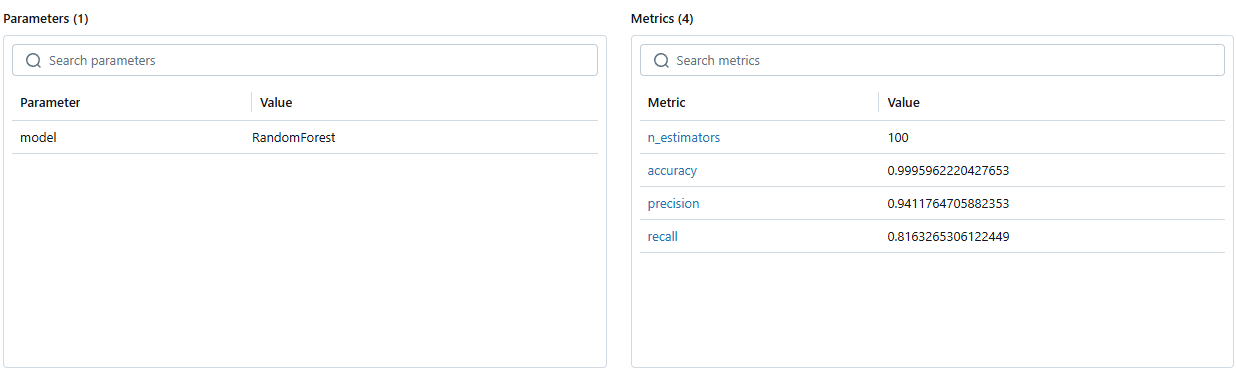

Random Forest 의 성능이 더 좋음을 알 수 있음